In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best17.csv")
df = df.drop_duplicates()
print(df.head())

       KLHL21        LZIC        GHITM       FBXW4       NLRP6    MIR4537  \
0  408.378949  119.082494   958.714995  168.195613  162.813354  12.782867   
1  253.319773  118.435219  1178.869074  178.749450   81.150057  16.449336   
2  532.444640  122.686792   962.249350  149.148649  180.421753   4.811247   
3  391.074568  132.363700  1472.846990  105.890960  409.124164   2.406613   
4  399.819591  139.601813  1269.818087  147.419514  136.251369  13.401774   

         HBA1        KAT8        NFIX        JUND     ZNF582   MIR663AHG  \
0  422.507380  229.418816  173.577873  294.678714  22.201821  956.023865   
1   87.729792  279.638711  100.889260  276.348843  18.642581  652.490325   
2  258.203576  278.250437  139.526156  255.797952  23.254359  230.137970   
3   93.857896  305.639816   57.758705  175.682729  43.319029  454.849806   
4  751.616159  217.778828  211.077941  243.465561  26.803548   64.775241   

       CLIC6         PXK  LOC101243545       MAP1B       KANTR  Target  
0   4.7

In [3]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [4]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [5]:

df.describe()

,KLHL21,LZIC,GHITM,FBXW4,NLRP6,MIR4537,HBA1,KAT8,NFIX,JUND,ZNF582,MIR663AHG,CLIC6,PXK,LOC101243545,MAP1B,KANTR,Target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,341.190567,136.380108,1316.600825,160.215432,169.348899,9.362595,5631.022563,266.777843,201.365632,266.508239,29.506354,681.840503,3.872180,256.507771,85.236171,20716.912286,68.295853,0.431034
std,132.385307,48.225795,417.421640,62.692747,134.415089,8.547251,22376.681532,45.054985,451.931079,291.919740,9.753641,1065.674828,4.924806,75.158344,86.748891,84011.721084,18.337080,0.497369
min,66.370880,80.726335,551.370727,72.174788,5.006662,1.000000,5.788649,165.482936,6.753424,59.757097,5.620869,8.483496,1.000000,92.618381,1.000000,2.165143,10.013325,0.000000
25%,262.744890,113.147906,1111.321750,128.284451,102.645681,3.681635,45.582804,235.568519,69.344060,123.953297,23.326957,83.343558,1.000000,214.513117,25.079348,24.096767,56.578993,0.000000
50%,315.817003,126.301624,1266.457106,149.552023,137.750146,5.962768,225.706240,266.388902,94.318849,197.398628,29.094008,300.196621,1.965003,247.881034,38.451703,197.766605,70.584817,0.000000
75%,393.077684,143.457188,1436.113204,175.558203,191.200896,12.593158,757.331937,285.892972,155.725190,296.450687,33.859239,770.164663,3.915522,282.903629,128.311941,626.153699,80.458632,1.000000
max,1136.361050,467.984177,4642.026371,600.611272,848.504583,39.113255,165229.888627,505.662279,3351.676152,2298.238085,69.124421,7208.064725,34.068601,707.927191,385.882601,575118.397908,105.574372,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['KLHL21', 'LZIC', 'GHITM', 'FBXW4', 'NLRP6', 'MIR4537', 'HBA1', 'KAT8', 'NFIX', 'JUND', 'ZNF582', 'MIR663AHG', 'CLIC6', 'PXK', 'LOC101243545', 'MAP1B', 'KANTR', 'Target']
18


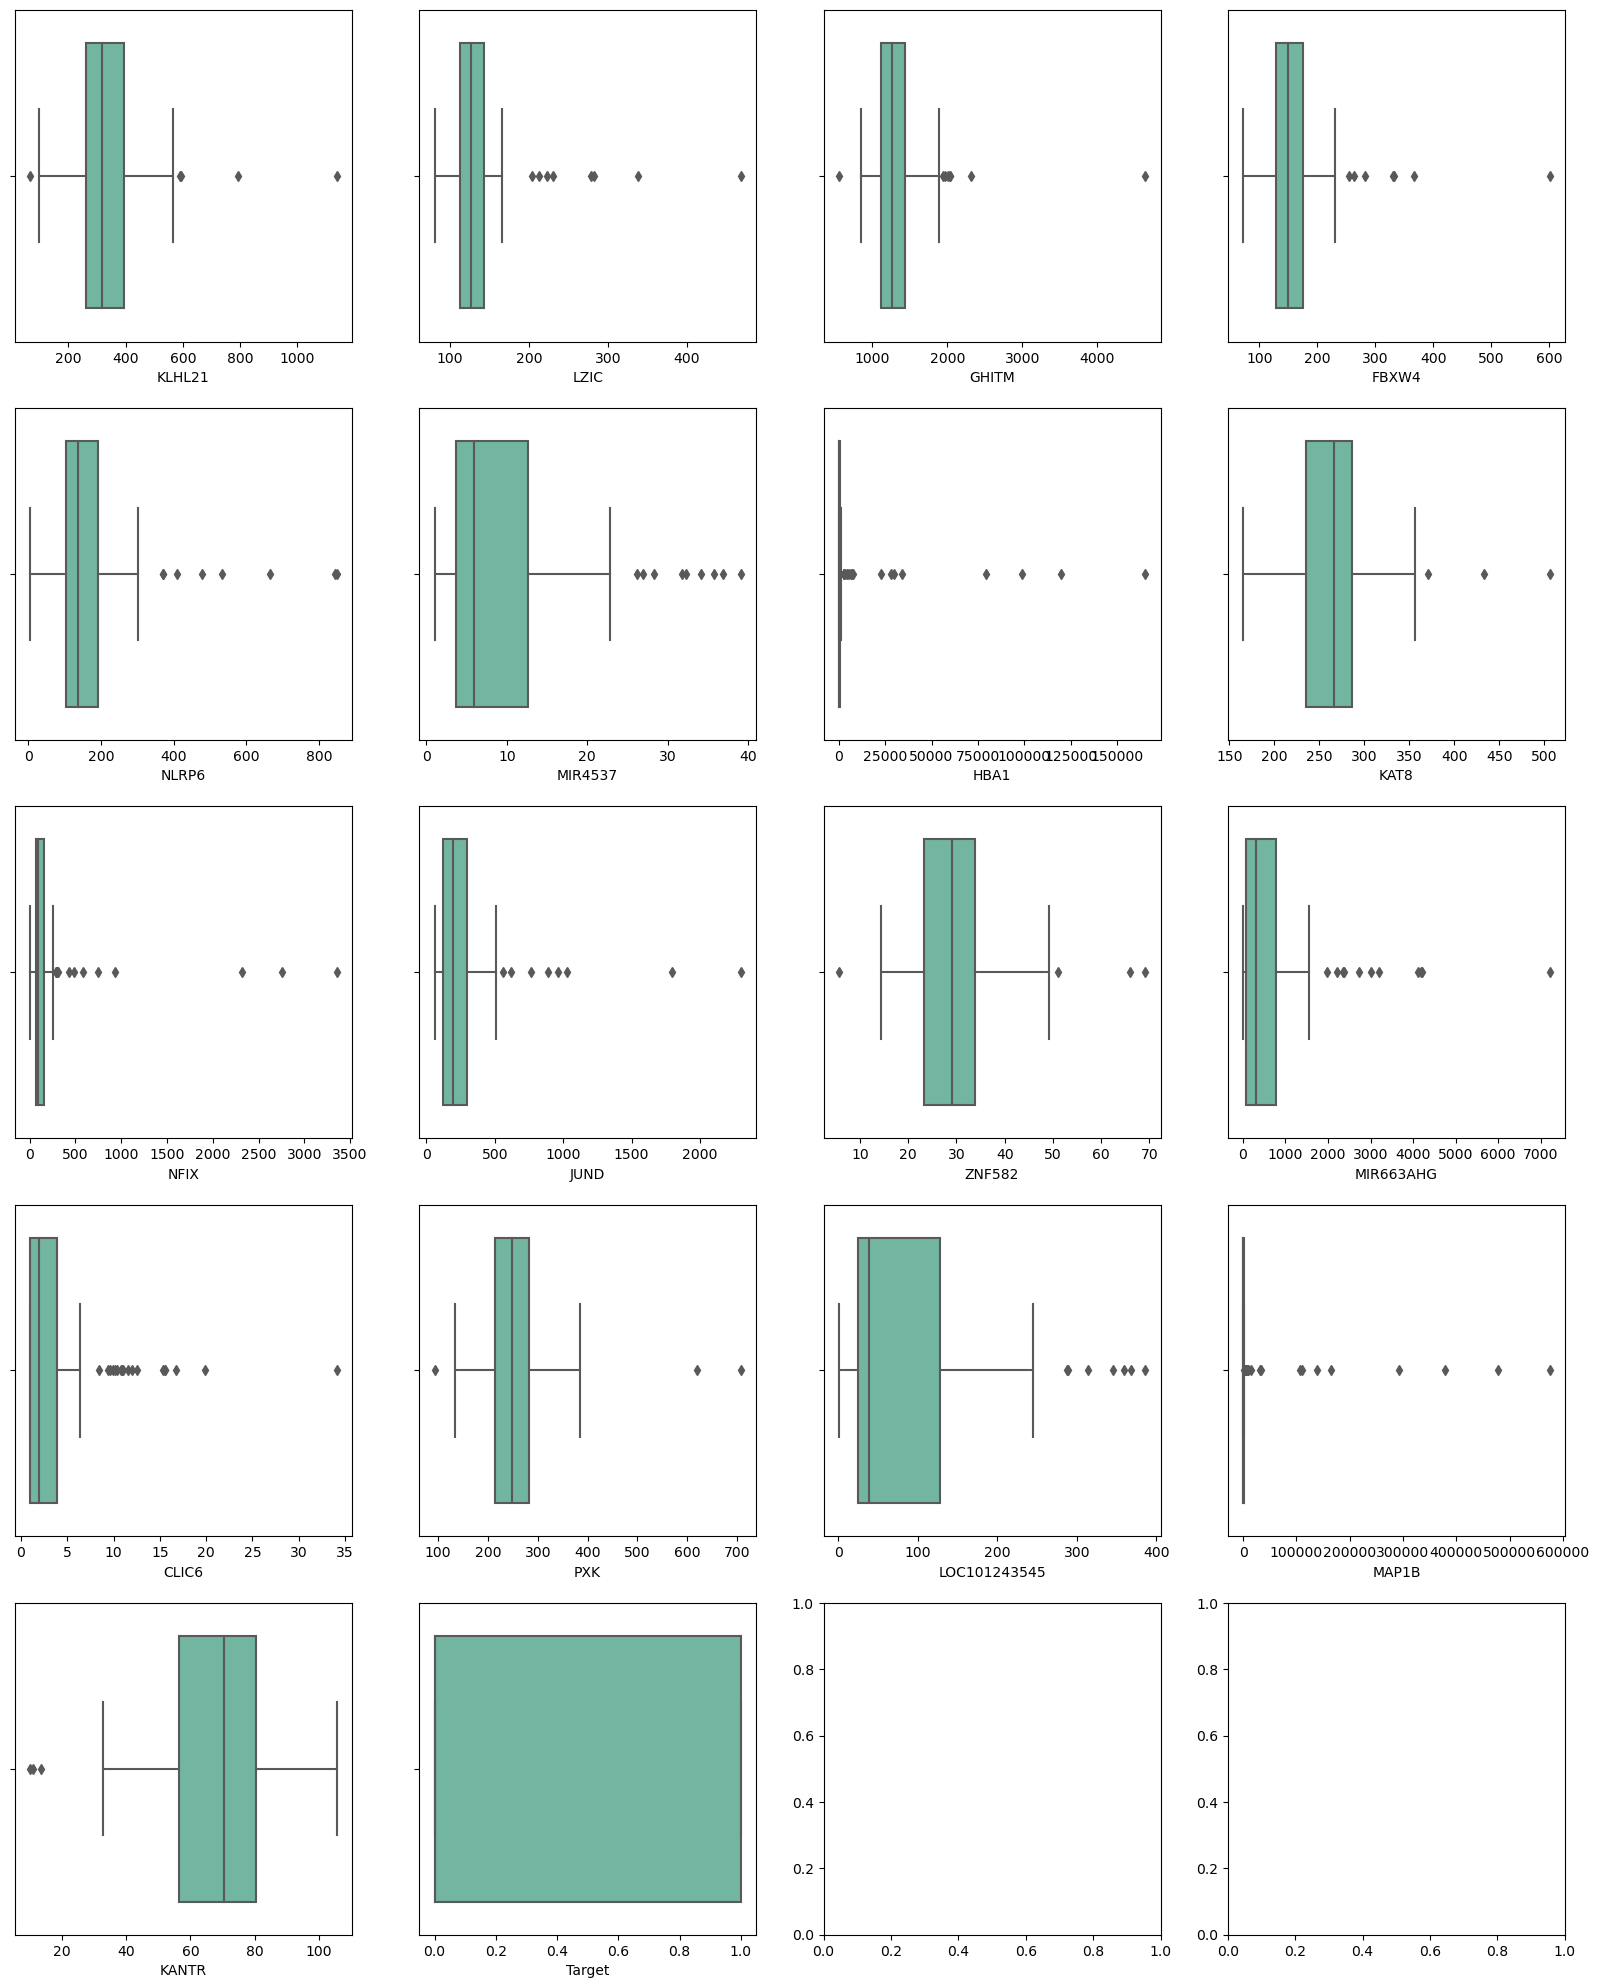

In [7]:
fig, axes = plt.subplots(5,4, figsize=(20,25))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['KLHL21', 'LZIC', 'GHITM', 'FBXW4', 'NLRP6', 'MIR4537', 'HBA1', 'KAT8',
       'NFIX', 'JUND', 'ZNF582', 'MIR663AHG', 'CLIC6', 'PXK', 'LOC101243545',
       'MAP1B', 'KANTR', 'Target'],
      dtype='object')
     KLHL21      LZIC     GHITM     FBXW4     NLRP6   MIR4537      HBA1  \
0  0.319637  0.099046  0.099579  0.181707  0.187086  0.309154  0.002522   
1  0.174720  0.097374  0.153398  0.201679  0.090271  0.405353  0.000496   
2  0.435587  0.108353  0.100443  0.145663  0.207961  0.099998  0.001528   
3  0.303464  0.133341  0.225264  0.063804  0.479097  0.036906  0.000533   
4  0.311637  0.152032  0.175631  0.142391  0.155596  0.325393  0.004514   

       KAT8      NFIX      JUND    ZNF582  MIR663AHG     CLIC6       PXK  \
0  0.187948  0.049874  0.104947  0.261103   0.131610  0.112175  0.332762   
1  0.335575  0.028143  0.096758  0.205055   0.089451  0.036084  0.229092   
2  0.331494  0.039694  0.087578  0.277677   0.030787  0.284994  0.344695   
3  0.412009  0.015249  0.05178

In [9]:
x = df_02.drop(["Target"], axis =1);
y = df["Target"]
print(y.value_counts())

0.0    66
1.0    50
Name: Target, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

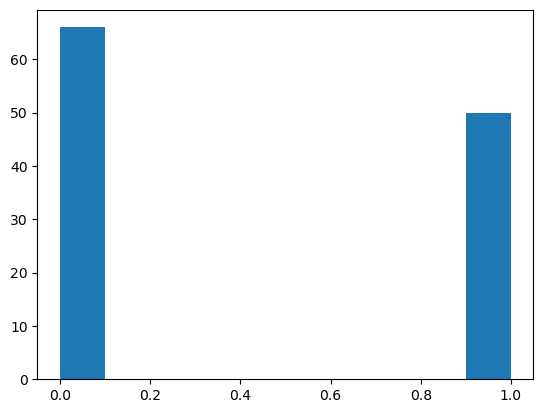

In [10]:
plt.hist(y)

1.0    66
0.0    66
Name: Target, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

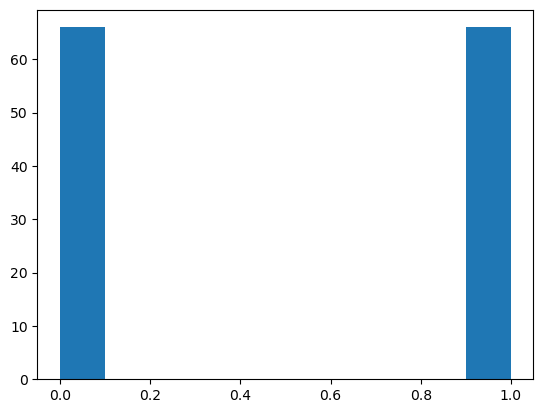

In [11]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [12]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  78.788
Standed deviation :  1.515
CV value :  3
Parameters :  {}
Accuracy :  75.000
Standed deviation :  0.000
CV value :  4
Parameters :  {}
Accuracy :  71.970
Standed deviation :  9.907
CV value :  5
Parameters :  {}
Accuracy :  73.618
Standed deviation :  8.123


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  79.545
Standed deviation :  2.273
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  81.818
Standed deviation :  5.567
CV value :  4
Parameters :  {'random_state': 4}
Accuracy :  82.576
Standed deviation :  7.836
CV value :  5
Parameters :  {'random_state': 30}
Accuracy :  82.707
Standed deviation :  9.454


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  72.727
Standed deviation :  0.000
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  72.727
Standed deviation :  1.856
CV value :  4
Parameters :  {'n_neighbors': 11}
Accuracy :  76.515
Standed deviation :  7.227
CV value :  5
Parameters :  {'n_neighbors': 7}
Accuracy :  76.553
Standed deviation :  4.180


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  64.394
Standed deviation :  2.273
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  69.697
Standed deviation :  5.965
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  71.212
Standed deviation :  10.820
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  71.168
Standed deviation :  6.733


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  62.121
Standed deviation :  0.000
CV value :  3
Parameters :  {}
Accuracy :  68.939
Standed deviation :  5.357
CV value :  4
Parameters :  {}
Accuracy :  73.485
Standed deviation :  9.907
CV value :  5
Parameters :  {}
Accuracy :  71.909
Standed deviation :  5.466


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  75.000
Standed deviation :  5.303


CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  75.000
Standed deviation :  6.428
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  76.515
Standed deviation :  13.783
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  75.783
Standed deviation :  3.654


In [18]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 3, 'n_estimators': 300}
Accuracy :  83.333
Standed deviation :  4.545
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 100}
Accuracy :  83.333
Standed deviation :  2.835
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 300}
Accuracy :  85.606
Standed deviation :  7.836
CV value :  5
Parameters :  {'max_depth': 110, 'max_features': 3, 'n_estimators': 100}
Accuracy :  84.188
Standed deviation :  7.116
